## Connecting the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import os
sns.set()

from math import *
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Final Dataset for python.csv")

In [ ]:
df.head()

,Quarter,Stage 3 Ratio %,Overall Banking Sector NPA % Lag 2,Average Weighted Prime Lending Rate - AWPR (percent p.a.),Average Weighted Deposit Rate (percent p.a.),Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.),GDP Growth Rate,DTI Ratio,Quarterly Average Exchange Rate USD/LKR,"Colombo Consumers' Price Index, Base 2013=100",...,Private Sector Credit Growth,Unemployment rate,LLR/TL Ratio %,ROA Ratio %,ROE Ratio %,SLAR for Domestic Bank units %,Debt/Equity times,Interest Margin %,CAR%,Cost-to-Income Ratio %
0,3/31/2015,0.0863,0.0527,0.0709,0.0583,0.0687,0.055,44.18,132.40,178.1,...,0.0482,0.047,0.0214,0.0155,0.1103,0.2852,0.0033,0.0449,0.1394,0.5718
1,6/30/2015,0.0653,0.0425,0.0700,0.0602,0.0729,0.026,22.33,133.45,181.6,...,0.0307,0.045,0.0216,0.0203,0.1452,0.2791,0.0031,0.0459,0.1374,0.5155
2,9/30/2015,0.0612,0.0433,0.0704,0.0600,0.0722,0.041,15.18,135.48,181.4,...,0.0685,0.051,0.0212,0.0208,0.1503,0.2832,0.0031,0.0454,0.1313,0.5531
3,12/31/2015,0.0468,0.0433,0.0753,0.0620,0.0757,0.028,11.73,142.12,185.2,...,0.0489,0.044,0.0210,0.0216,0.1562,0.2756,0.0029,0.0433,0.1287,0.5341
4,3/31/2016,0.0471,0.0398,0.0919,0.0644,0.0792,0.051,44.05,143.94,181.7,...,0.0452,0.042,0.0198,0.0127,0.1213,0.2192,0.0032,0.0385,0.1143,0.6373


In [ ]:
df.shape

(32, 26)

In [ ]:
df.columns

Index(['Quarter', 'Stage 3 Ratio %', 'Overall Banking Sector NPA % Lag 2',
       'Average Weighted Prime Lending Rate - AWPR (percent p.a.)',
       'Average Weighted Deposit Rate (percent p.a.)',
       'Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.)',
       'GDP Growth Rate', 'DTI Ratio',
       'Quarterly Average Exchange Rate USD/LKR',
       'Colombo Consumers' Price Index, Base 2013=100',
       'Average of Inter Bank Call - Minimum Rate',
       'Average of Inter Bank Call - Maximum Rate',
       'Inter Bank Call - Weighted Average Rate',
       'Average of Market Repo - Minimum Rate',
       'Average of Market Rate - Maximum Rate',
       'Market Repo - Weighted Average Rate', 'Private Sector Credit Growth',
       'Unemployment rate', 'LLR/TL Ratio %', 'ROA Ratio %', 'ROE Ratio %',
       'SLAR for Domestic Bank units %', 'Debt/Equity times',
       'Interest Margin %', 'CAR%', 'Cost-to-Income Ratio %'],
      dtype='object')

In [ ]:
df.dtypes

Quarter                                                        object
Stage 3 Ratio %                                               float64
Overall Banking Sector NPA % Lag 2                            float64
Average Weighted Prime Lending Rate - AWPR (percent p.a.)     float64
Average Weighted Deposit Rate (percent p.a.)                  float64
Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.)    float64
GDP Growth Rate                                               float64
DTI Ratio                                                     float64
Quarterly Average Exchange Rate USD/LKR                       float64
Colombo Consumers' Price Index, Base 2013=100                 float64
Average of Inter Bank Call - Minimum Rate                     float64
Average of Inter Bank Call - Maximum Rate                     float64
Inter Bank Call - Weighted Average Rate                       float64
Average of Market Repo - Minimum Rate                         float64
Average of Market Ra

## Data Preprocessing

In [ ]:
df.describe(include = 'all')

,Quarter,Stage 3 Ratio %,Overall Banking Sector NPA % Lag 2,Average Weighted Prime Lending Rate - AWPR (percent p.a.),Average Weighted Deposit Rate (percent p.a.),Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.),GDP Growth Rate,DTI Ratio,Quarterly Average Exchange Rate USD/LKR,"Colombo Consumers' Price Index, Base 2013=100",...,Private Sector Credit Growth,Unemployment rate,LLR/TL Ratio %,ROA Ratio %,ROE Ratio %,SLAR for Domestic Bank units %,Debt/Equity times,Interest Margin %,CAR%,Cost-to-Income Ratio %
count,32,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
unique,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3/31/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.056128,0.042141,0.109719,0.076859,0.096144,0.010969,21.217188,185.342188,155.481250,...,0.033312,0.047375,0.029491,0.012125,0.106300,0.244672,0.004206,0.042434,0.134300,0.497700
std,NaN,0.010570,0.013349,0.052633,0.020456,0.028218,0.061237,11.954067,60.632995,36.337455,...,0.026604,0.004858,0.017690,0.004184,0.030365,0.030297,0.000753,0.005244,0.008043,0.084300
min,NaN,0.036400,0.025000,0.056700,0.047500,0.056400,-0.163000,9.330000,132.400000,116.500000,...,-0.032900,0.040000,0.017900,0.005600,0.058300,0.206000,0.002900,0.036300,0.113300,0.279300
25%,NaN,0.047025,0.030725,0.074200,0.060150,0.072725,0.012500,12.020000,150.052500,126.525000,...,0.023825,0.044750,0.019250,0.009225,0.084325,0.222100,0.003775,0.039950,0.130200,0.462900
50%,NaN,0.056600,0.042900,0.106350,0.080350,0.098600,0.027000,17.220000,175.915000,138.450000,...,0.035150,0.046000,0.021500,0.010900,0.097700,0.231900,0.004200,0.041300,0.135400,0.525450
75%,NaN,0.064225,0.049225,0.117050,0.089250,0.111475,0.039250,26.977500,190.122500,181.625000,...,0.048375,0.051000,0.030725,0.014825,0.127725,0.263675,0.004700,0.042700,0.138875,0.546375


No missing values included in the dataset

### Handling of Missing values

In [ ]:
df.describe()

,Stage 3 Ratio %,Overall Banking Sector NPA % Lag 2,Average Weighted Prime Lending Rate - AWPR (percent p.a.),Average Weighted Deposit Rate (percent p.a.),Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.),GDP Growth Rate,DTI Ratio,Quarterly Average Exchange Rate USD/LKR,"Colombo Consumers' Price Index, Base 2013=100",Average of Inter Bank Call - Minimum Rate,...,Private Sector Credit Growth,Unemployment rate,LLR/TL Ratio %,ROA Ratio %,ROE Ratio %,SLAR for Domestic Bank units %,Debt/Equity times,Interest Margin %,CAR%,Cost-to-Income Ratio %
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.056128,0.042141,0.109719,0.076859,0.096144,0.010969,21.217188,185.342188,155.481250,0.078869,...,0.033312,0.047375,0.029491,0.012125,0.106300,0.244672,0.004206,0.042434,0.134300,0.497700
std,0.010570,0.013349,0.052633,0.020456,0.028218,0.061237,11.954067,60.632995,36.337455,0.027352,...,0.026604,0.004858,0.017690,0.004184,0.030365,0.030297,0.000753,0.005244,0.008043,0.084300
min,0.036400,0.025000,0.056700,0.047500,0.056400,-0.163000,9.330000,132.400000,116.500000,0.045200,...,-0.032900,0.040000,0.017900,0.005600,0.058300,0.206000,0.002900,0.036300,0.113300,0.279300
25%,0.047025,0.030725,0.074200,0.060150,0.072725,0.012500,12.020000,150.052500,126.525000,0.062875,...,0.023825,0.044750,0.019250,0.009225,0.084325,0.222100,0.003775,0.039950,0.130200,0.462900
50%,0.056600,0.042900,0.106350,0.080350,0.098600,0.027000,17.220000,175.915000,138.450000,0.079250,...,0.035150,0.046000,0.021500,0.010900,0.097700,0.231900,0.004200,0.041300,0.135400,0.525450
75%,0.064225,0.049225,0.117050,0.089250,0.111475,0.039250,26.977500,190.122500,181.625000,0.084275,...,0.048375,0.051000,0.030725,0.014825,0.127725,0.263675,0.004700,0.042700,0.138875,0.546375
max,0.086300,0.079300,0.281900,0.140600,0.184900,0.163000,45.790000,363.240000,244.700000,0.155000,...,0.091400,0.058000,0.084100,0.021600,0.156200,0.313100,0.005800,0.063300,0.148400,0.637300


In [ ]:
df.isnull().sum()

Quarter                                                       0
Stage 3 Ratio %                                               0
Overall Banking Sector NPA % Lag 2                            0
Average Weighted Prime Lending Rate - AWPR (percent p.a.)     0
Average Weighted Deposit Rate (percent p.a.)                  0
Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.)    0
GDP Growth Rate                                               0
DTI Ratio                                                     0
Quarterly Average Exchange Rate USD/LKR                       0
Colombo Consumers' Price Index, Base 2013=100                 0
Average of Inter Bank Call - Minimum Rate                     0
Average of Inter Bank Call - Maximum Rate                     0
Inter Bank Call - Weighted Average Rate                       0
Average of Market Repo - Minimum Rate                         0
Average of Market Rate - Maximum Rate                         0
Market Repo - Weighted Average Rate     

No Missing values detected

In [ ]:
data = df.drop('Quarter', axis=1)

In [ ]:
data.columns

Index(['Stage 3 Ratio %', 'Overall Banking Sector NPA % Lag 2',
       'Average Weighted Prime Lending Rate - AWPR (percent p.a.)',
       'Average Weighted Deposit Rate (percent p.a.)',
       'Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.)',
       'GDP Growth Rate', 'DTI Ratio',
       'Quarterly Average Exchange Rate USD/LKR',
       'Colombo Consumers' Price Index, Base 2013=100',
       'Average of Inter Bank Call - Minimum Rate',
       'Average of Inter Bank Call - Maximum Rate',
       'Inter Bank Call - Weighted Average Rate',
       'Average of Market Repo - Minimum Rate',
       'Average of Market Rate - Maximum Rate',
       'Market Repo - Weighted Average Rate', 'Private Sector Credit Growth',
       'Unemployment rate', 'LLR/TL Ratio %', 'ROA Ratio %', 'ROE Ratio %',
       'SLAR for Domestic Bank units %', 'Debt/Equity times',
       'Interest Margin %', 'CAR%', 'Cost-to-Income Ratio %'],
      dtype='object')

### Detection of outliers


In [ ]:
from scipy.stats import skew

Most of the variables are highly postive skewed where sometimes because of outliers where removal of outliers is not a good solution whereas using log transformation just symmetric the dataset.


In [ ]:
data.skew()

Stage 3 Ratio %                                               0.402044
Overall Banking Sector NPA % Lag 2                            1.058306
Average Weighted Prime Lending Rate - AWPR (percent p.a.)     2.132404
Average Weighted Deposit Rate (percent p.a.)                  0.857360
Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.)    0.961504
GDP Growth Rate                                              -1.020142
DTI Ratio                                                     0.966050
Quarterly Average Exchange Rate USD/LKR                       2.227446
Colombo Consumers' Price Index, Base 2013=100                 1.058463
Average of Inter Bank Call - Minimum Rate                     1.660767
Average of Inter Bank Call - Maximum Rate                     1.620971
Inter Bank Call - Weighted Average Rate                       1.641873
Average of Market Repo - Minimum Rate                         1.699758
Average of Market Rate - Maximum Rate                         1.308278
Market

AWPR
ER
Avg int bank call min rate
Avg int bank call max rate
Inter Bank call WARate
Avg market repo min rate
LLR/TL
Int margin **bold text** sounds high in skewness



In [ ]:
data.describe()

,Stage 3 Ratio %,Overall Banking Sector NPA % Lag 2,Average Weighted Prime Lending Rate - AWPR (percent p.a.),Average Weighted Deposit Rate (percent p.a.),Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.),GDP Growth Rate,DTI Ratio,Quarterly Average Exchange Rate USD/LKR,"Colombo Consumers' Price Index, Base 2013=100",Average of Inter Bank Call - Minimum Rate,...,Private Sector Credit Growth,Unemployment rate,LLR/TL Ratio %,ROA Ratio %,ROE Ratio %,SLAR for Domestic Bank units %,Debt/Equity times,Interest Margin %,CAR%,Cost-to-Income Ratio %
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.056128,0.042141,0.109719,0.076859,0.096144,0.010969,21.217188,185.342188,155.481250,0.078869,...,0.033312,0.047375,0.029491,0.012125,0.106300,0.244672,0.004206,0.042434,0.134300,0.497700
std,0.010570,0.013349,0.052633,0.020456,0.028218,0.061237,11.954067,60.632995,36.337455,0.027352,...,0.026604,0.004858,0.017690,0.004184,0.030365,0.030297,0.000753,0.005244,0.008043,0.084300
min,0.036400,0.025000,0.056700,0.047500,0.056400,-0.163000,9.330000,132.400000,116.500000,0.045200,...,-0.032900,0.040000,0.017900,0.005600,0.058300,0.206000,0.002900,0.036300,0.113300,0.279300
25%,0.047025,0.030725,0.074200,0.060150,0.072725,0.012500,12.020000,150.052500,126.525000,0.062875,...,0.023825,0.044750,0.019250,0.009225,0.084325,0.222100,0.003775,0.039950,0.130200,0.462900
50%,0.056600,0.042900,0.106350,0.080350,0.098600,0.027000,17.220000,175.915000,138.450000,0.079250,...,0.035150,0.046000,0.021500,0.010900,0.097700,0.231900,0.004200,0.041300,0.135400,0.525450
75%,0.064225,0.049225,0.117050,0.089250,0.111475,0.039250,26.977500,190.122500,181.625000,0.084275,...,0.048375,0.051000,0.030725,0.014825,0.127725,0.263675,0.004700,0.042700,0.138875,0.546375
max,0.086300,0.079300,0.281900,0.140600,0.184900,0.163000,45.790000,363.240000,244.700000,0.155000,...,0.091400,0.058000,0.084100,0.021600,0.156200,0.313100,0.005800,0.063300,0.148400,0.637300


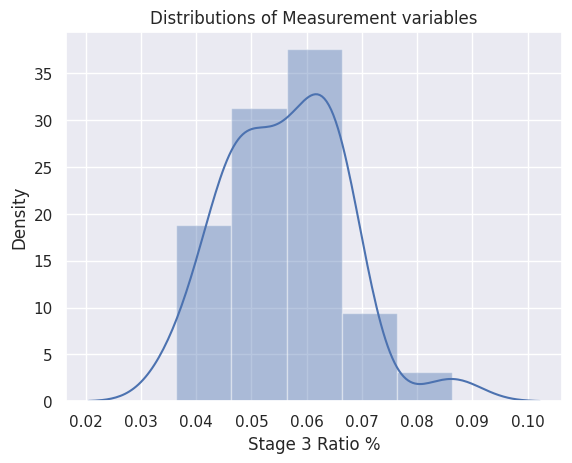

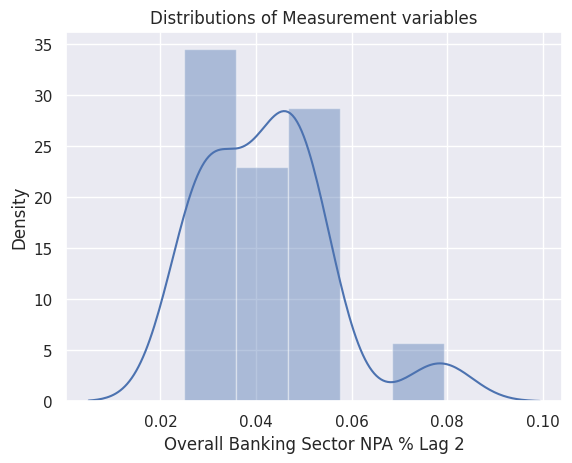

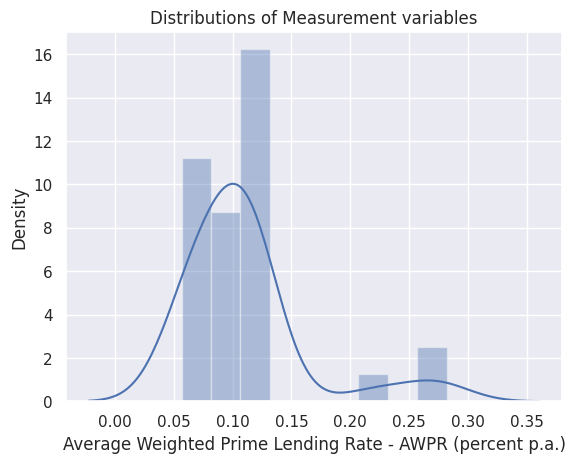

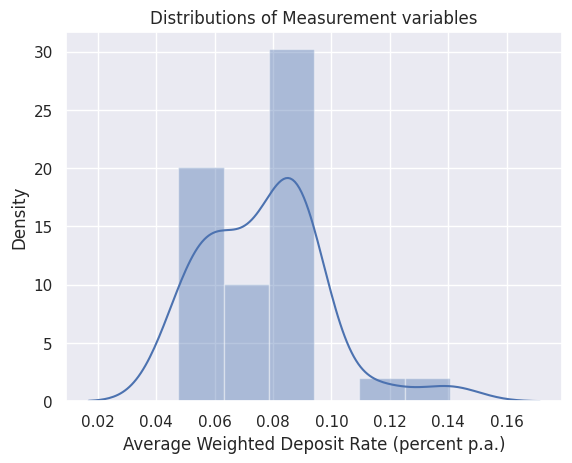

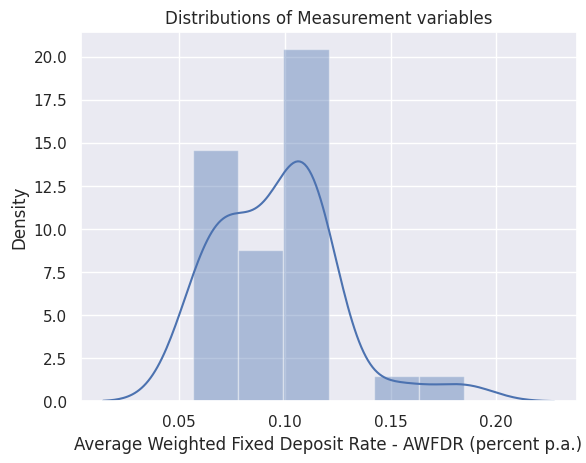

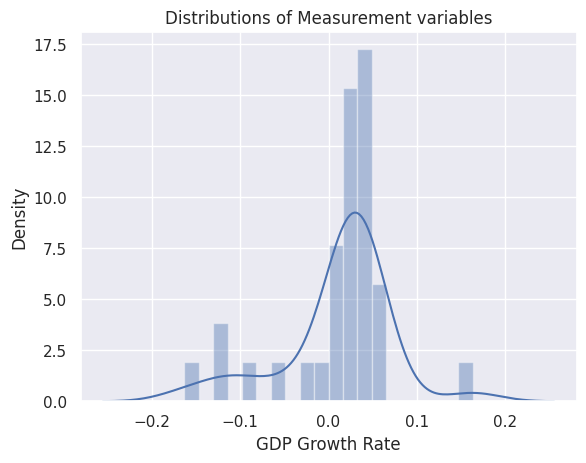

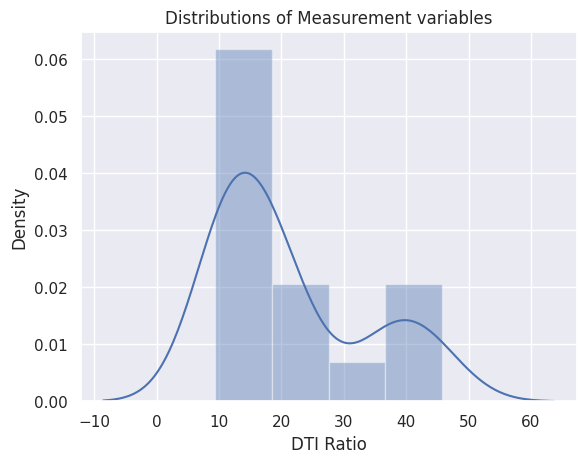

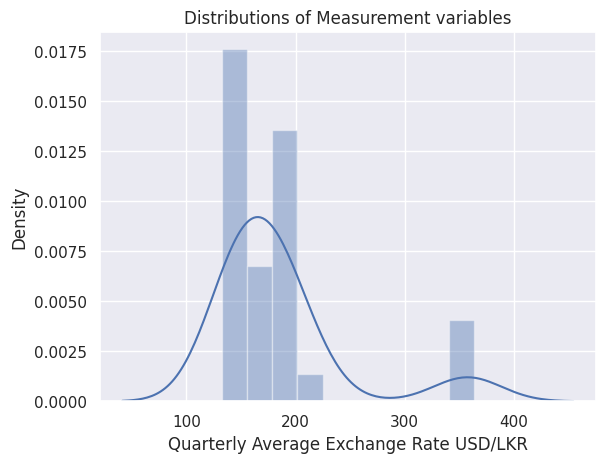

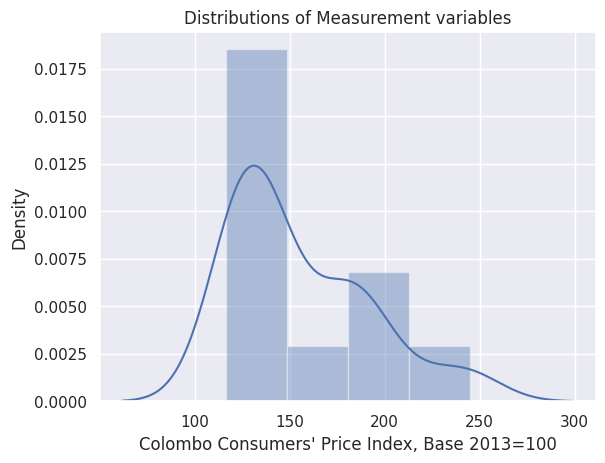

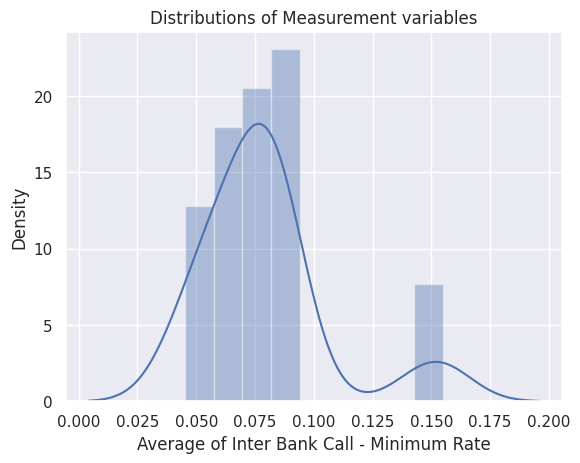

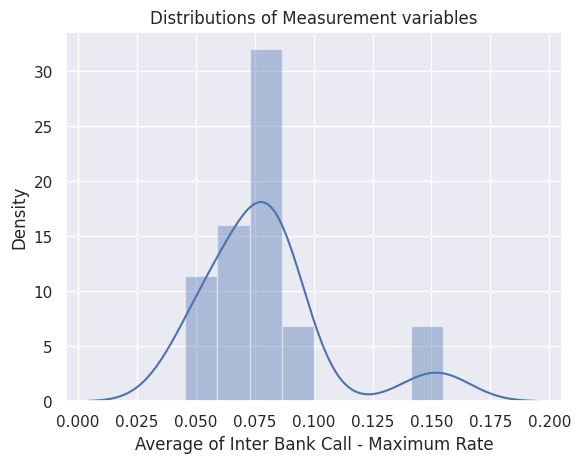

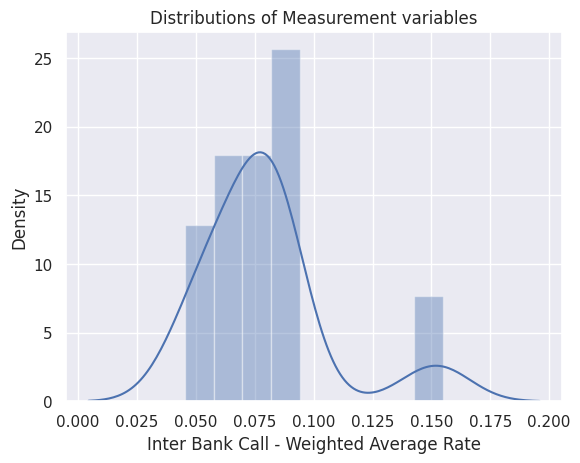

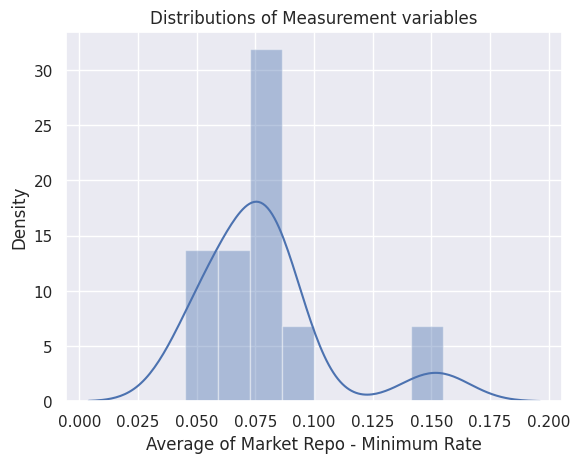

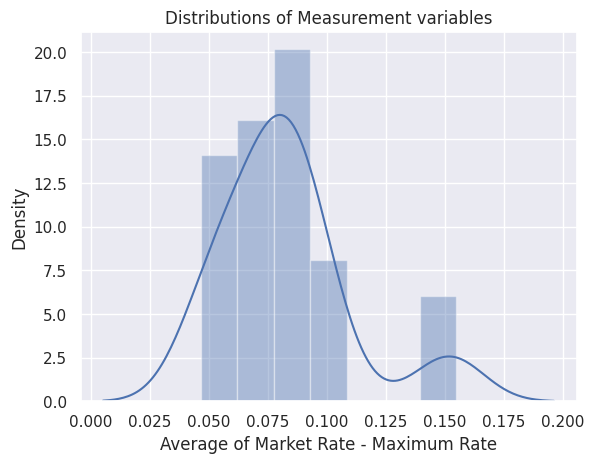

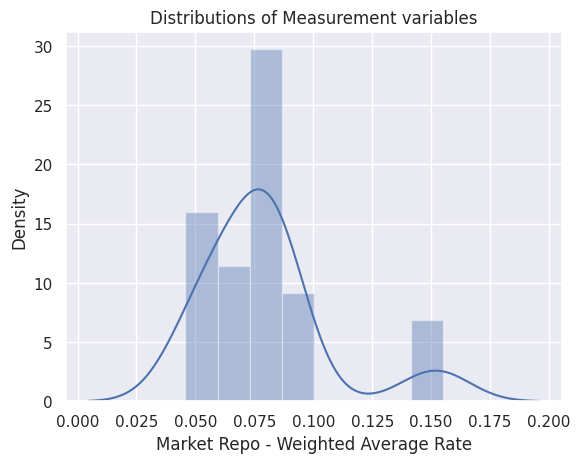

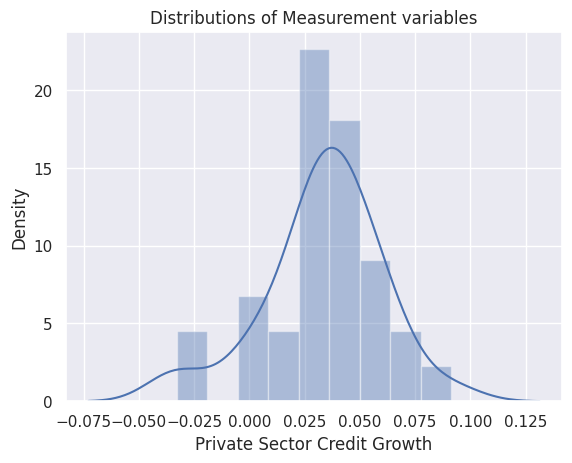

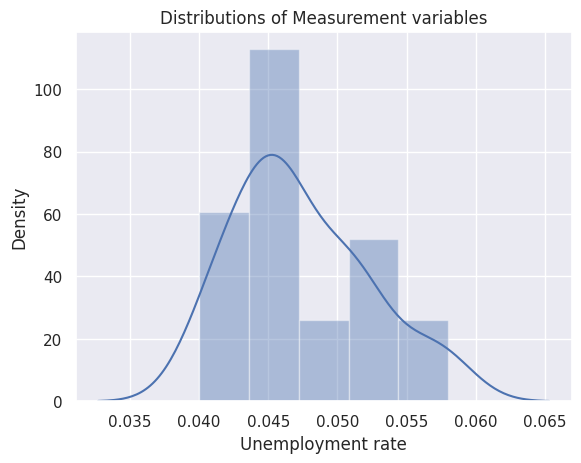

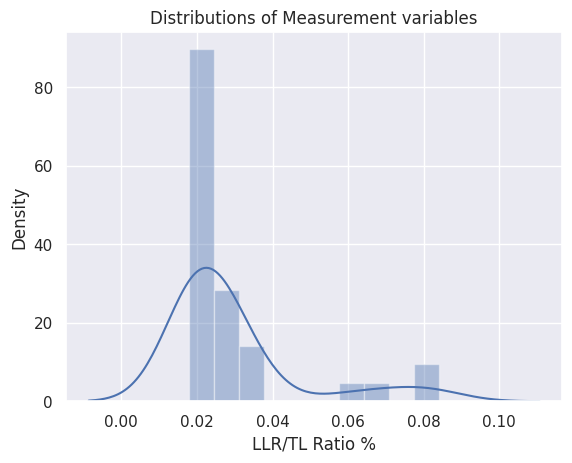

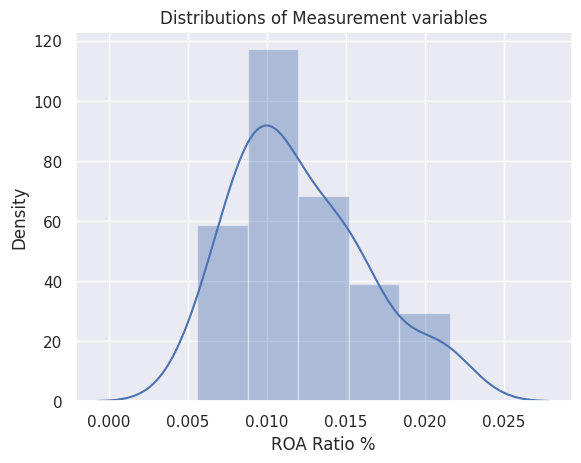

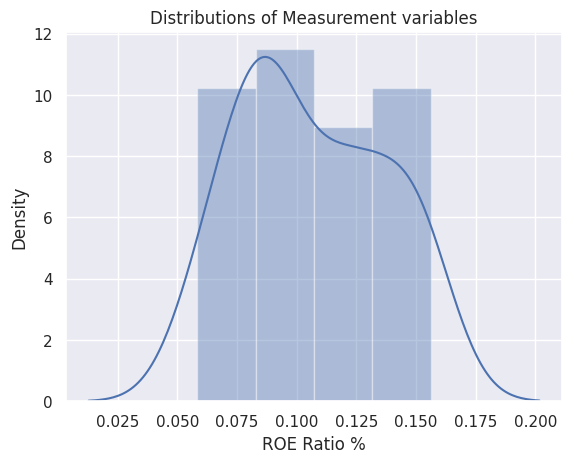

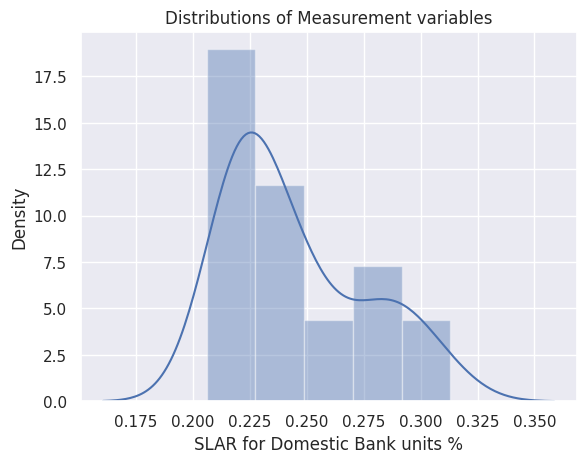

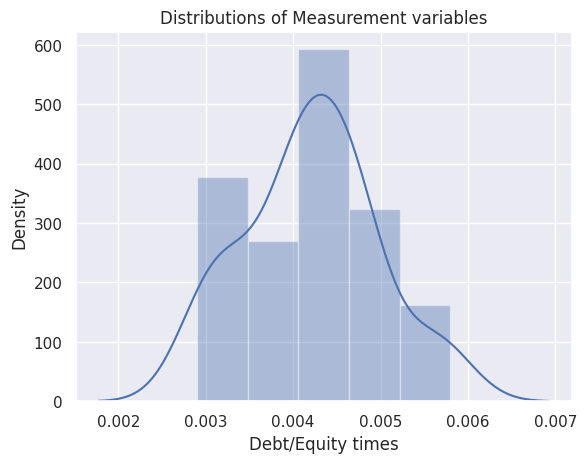

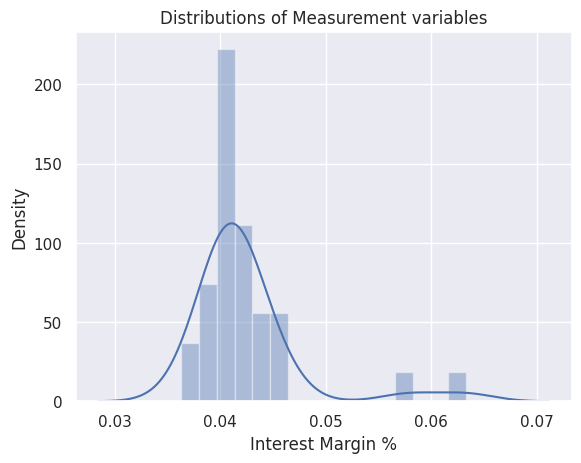

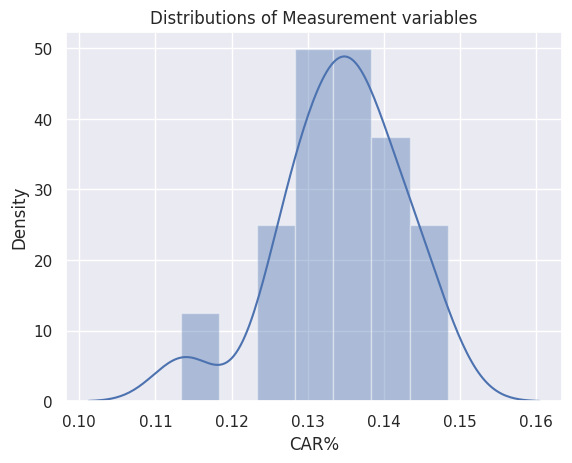

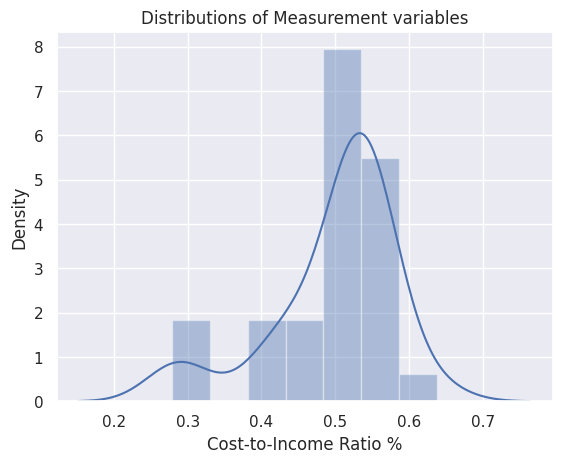

In [ ]:
for column in data.columns:
  plt.figure()  # Create a new figure for each distplot
  sns.distplot(data[column], hist=True, kde=True)
  plt.title('Distributions of Measurement variables')
  plt.xlabel(column)
  plt.ylabel('Density')

NO any significnat outliers foudn cinsdering to the variable

### Detection of Normality

In [ ]:
from scipy import stats

In [ ]:
data.columns

Index(['Stage 3 Ratio %', 'Overall Banking Sector NPA % Lag 2',
       'Average Weighted Prime Lending Rate - AWPR (percent p.a.)',
       'Average Weighted Deposit Rate (percent p.a.)',
       'Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.)',
       'GDP Growth Rate', 'DTI Ratio',
       'Quarterly Average Exchange Rate USD/LKR',
       'Colombo Consumers' Price Index, Base 2013=100',
       'Average of Inter Bank Call - Minimum Rate',
       'Average of Inter Bank Call - Maximum Rate',
       'Inter Bank Call - Weighted Average Rate',
       'Average of Market Repo - Minimum Rate',
       'Average of Market Rate - Maximum Rate',
       'Market Repo - Weighted Average Rate', 'Private Sector Credit Growth',
       'Unemployment rate', 'LLR/TL Ratio %', 'ROA Ratio %', 'ROE Ratio %',
       'SLAR for Domestic Bank units %', 'Debt/Equity times',
       'Interest Margin %', 'CAR%', 'Cost-to-Income Ratio %'],
      dtype='object')

In [ ]:
data.shape

(32, 25)

In [ ]:
result = stats.anderson(data['Stage 3 Ratio %'])
result

AndersonResult(statistic=0.41144897828833393, critical_values=array([0.523, 0.596, 0.715, 0.834, 0.992]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.056128125, scale=0.01056995847567148)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
test_statistic = result.statistic
critical_values = result.critical_values
test_statistic
critical_values

array([0.523, 0.596, 0.715, 0.834, 0.992])

The following results defines that the dependent variable follows a normal distribution

### Feature Selection and Removing Multicollinerity

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Separate the predictor variables (X) from the target variable (y)
X = data.drop('Stage 3 Ratio %',axis=1)
y = data['Stage 3 Ratio %']

# Add a constant column to the predictor variables (required by statsmodels)
X = sm.add_constant(X)

# Fit a multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                                             Variable           VIF
0                                               const   6064.732259
1                  Overall Banking Sector NPA % Lag 2     20.094740
2   Average Weighted Prime Lending Rate - AWPR (pe...    899.819071
3        Average Weighted Deposit Rate (percent p.a.)   1258.930833
4   Average Weighted Fixed Deposit Rate - AWFDR (p...   1212.883445
5                                     GDP Growth Rate      6.086366
6                                           DTI Ratio      5.561824
7             Quarterly Average Exchange Rate USD/LKR    184.375524
8       Colombo Consumers' Price Index, Base 2013=100     35.639703
9           Average of Inter Bank Call - Minimum Rate  16993.928851
10          Average of Inter Bank Call - Maximum Rate  25766.724017
11            Inter Bank Call - Weighted Average Rate  54869.957626
12              Average of Market Repo - Minimum Rate   8768.716402
13              Average of Market Rate - Maximum

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size = 0.2, random_state = 365)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

In [ ]:
selector = SelectKBest(score_func=f_regression, k=24)  # Select top 5 features
X_train_selected = selector.fit_transform(x_train,y_train)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support(indices=True)].tolist()

# Print the selected feature names
selected_feature_names

['Overall Banking Sector NPA % Lag 2',
 'Average Weighted Prime Lending Rate - AWPR (percent p.a.)',
 'Average Weighted Deposit Rate (percent p.a.)',
 'Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.)',
 'GDP Growth Rate',
 'DTI Ratio',
 'Quarterly Average Exchange Rate USD/LKR',
 "Colombo Consumers' Price Index, Base 2013=100",
 'Average of Inter Bank Call - Minimum Rate',
 'Average of Inter Bank Call - Maximum Rate',
 'Inter Bank Call - Weighted Average Rate',
 'Average of Market Repo - Minimum Rate',
 'Average of Market Rate - Maximum Rate',
 'Market Repo - Weighted Average Rate',
 'Private Sector Credit Growth',
 'Unemployment rate',
 'LLR/TL Ratio %',
 'ROA Ratio %',
 'ROE Ratio %',
 'SLAR for Domestic Bank units %',
 'Debt/Equity times',
 'Interest Margin %',
 'CAR%',
 'Cost-to-Income Ratio %']

In [ ]:
# Separate the predictor variables (X) from the target variable (y)
from sklearn.feature_selection import RFE

# Create a model for feature selection
model = LinearRegression()

selector = RFE(model, n_features_to_select=24)  # Select top 5 features
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.support_].tolist()

# Print the selected feature names
selected_feature_names

['Overall Banking Sector NPA % Lag 2',
 'Average Weighted Prime Lending Rate - AWPR (percent p.a.)',
 'Average Weighted Deposit Rate (percent p.a.)',
 'Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.)',
 'GDP Growth Rate',
 'DTI Ratio',
 'Quarterly Average Exchange Rate USD/LKR',
 "Colombo Consumers' Price Index, Base 2013=100",
 'Average of Inter Bank Call - Minimum Rate',
 'Average of Inter Bank Call - Maximum Rate',
 'Inter Bank Call - Weighted Average Rate',
 'Average of Market Repo - Minimum Rate',
 'Average of Market Rate - Maximum Rate',
 'Market Repo - Weighted Average Rate',
 'Private Sector Credit Growth',
 'Unemployment rate',
 'LLR/TL Ratio %',
 'ROA Ratio %',
 'ROE Ratio %',
 'SLAR for Domestic Bank units %',
 'Debt/Equity times',
 'Interest Margin %',
 'CAR%',
 'Cost-to-Income Ratio %']

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25, 25)
(7, 25)
(25,)
(7,)


In [ ]:
X_new = data.drop(['Average of Inter Bank Call - Minimum Rate','Average of Inter Bank Call - Maximum Rate','Average of Market Repo - Minimum Rate','Average of Market Rate - Maximum Rate','Stage 3 Ratio %'],axis=1)

In [ ]:
X_new.columns

Index(['Overall Banking Sector NPA % Lag 2',
       'Average Weighted Prime Lending Rate - AWPR (percent p.a.)',
       'Average Weighted Deposit Rate (percent p.a.)',
       'Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.)',
       'GDP Growth Rate', 'DTI Ratio',
       'Quarterly Average Exchange Rate USD/LKR',
       'Colombo Consumers' Price Index, Base 2013=100',
       'Inter Bank Call - Weighted Average Rate',
       'Market Repo - Weighted Average Rate', 'Private Sector Credit Growth',
       'Unemployment rate', 'LLR/TL Ratio %', 'ROA Ratio %', 'ROE Ratio %',
       'SLAR for Domestic Bank units %', 'Debt/Equity times',
       'Interest Margin %', 'CAR%', 'Cost-to-Income Ratio %'],
      dtype='object')

In [ ]:
X_new.shape

(32, 20)

In [ ]:
y_new_1 = data['Stage 3 Ratio %']
y_new_1.shape

(32,)

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant column to the predictor variables (required by statsmodels)
X = sm.add_constant(X_new)

# Fit a multiple linear regression model
model = sm.OLS(y,X)
results = model.fit()

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X_new.columns
vif["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]

print(vif)

                                             Variable           VIF
0                  Overall Banking Sector NPA % Lag 2    201.590400
1   Average Weighted Prime Lending Rate - AWPR (pe...   2644.073116
2        Average Weighted Deposit Rate (percent p.a.)  16546.526030
3   Average Weighted Fixed Deposit Rate - AWFDR (p...  12747.718623
4                                     GDP Growth Rate      5.583106
5                                           DTI Ratio     14.018131
6             Quarterly Average Exchange Rate USD/LKR   1120.019342
7       Colombo Consumers' Price Index, Base 2013=100    489.945392
8             Inter Bank Call - Weighted Average Rate   8355.979752
9                 Market Repo - Weighted Average Rate   8599.148599
10                       Private Sector Credit Growth     12.372704
11                                  Unemployment rate    721.118897
12                                     LLR/TL Ratio %    283.059318
13                                        ROA Ra

In [ ]:
# Separate the predictor variables (X) from the target variable (y)
from sklearn.feature_selection import RFE

# Create a model for feature selection
model = LinearRegression()

selector = RFE(model, n_features_to_select=15)  # Select top 5 features
X_selected = selector.fit_transform(X_new, y)

# Get the selected feature names
selected_feature_names = X_new.columns[selector.support_].tolist()

# Print the selected feature names
selected_feature_names

['Overall Banking Sector NPA % Lag 2',
 'Average Weighted Prime Lending Rate - AWPR (percent p.a.)',
 'Average Weighted Deposit Rate (percent p.a.)',
 'Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.)',
 'Inter Bank Call - Weighted Average Rate',
 'Market Repo - Weighted Average Rate',
 'Unemployment rate',
 'LLR/TL Ratio %',
 'ROA Ratio %',
 'ROE Ratio %',
 'SLAR for Domestic Bank units %',
 'Debt/Equity times',
 'Interest Margin %',
 'CAR%',
 'Cost-to-Income Ratio %']

In [ ]:
x_new_1 = X_new.drop(['Average Weighted Deposit Rate (percent p.a.)','Debt/Equity times','Interest Margin %'],axis=1)

In [ ]:
x_new_1.columns

Index(['Overall Banking Sector NPA % Lag 2',
       'Average Weighted Prime Lending Rate - AWPR (percent p.a.)',
       'Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.)',
       'GDP Growth Rate', 'DTI Ratio',
       'Quarterly Average Exchange Rate USD/LKR',
       'Colombo Consumers' Price Index, Base 2013=100',
       'Inter Bank Call - Weighted Average Rate',
       'Market Repo - Weighted Average Rate', 'Private Sector Credit Growth',
       'Unemployment rate', 'LLR/TL Ratio %', 'ROA Ratio %', 'ROE Ratio %',
       'SLAR for Domestic Bank units %', 'CAR%', 'Cost-to-Income Ratio %'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant column to the predictor variables (required by statsmodels)
X = sm.add_constant(x_new_1)

# Fit a multiple linear regression model
model = sm.OLS(y,X)
results = model.fit()

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = x_new_1.columns
vif["VIF"] = [variance_inflation_factor(x_new_1.values, i) for i in range(x_new_1.shape[1])]

print(vif)

                                             Variable          VIF
0                  Overall Banking Sector NPA % Lag 2   124.033543
1   Average Weighted Prime Lending Rate - AWPR (pe...  1967.325132
2   Average Weighted Fixed Deposit Rate - AWFDR (p...   802.731702
3                                     GDP Growth Rate     3.137275
4                                           DTI Ratio     8.914613
5             Quarterly Average Exchange Rate USD/LKR   985.195558
6       Colombo Consumers' Price Index, Base 2013=100   397.095364
7             Inter Bank Call - Weighted Average Rate  4473.915622
8                 Market Repo - Weighted Average Rate  5427.580678
9                        Private Sector Credit Growth     9.676084
10                                  Unemployment rate   532.661881
11                                     LLR/TL Ratio %   165.174388
12                                        ROA Ratio %    91.602221
13                                        ROE Ratio %   200.31

# Exploratory Data Analysis


### Univariate Analysis

In [ ]:
df.columns

Index(['Quarter', 'Stage 3 Ratio %', 'Overall Banking Sector NPA % Lag 2',
       'Average Weighted Prime Lending Rate - AWPR (percent p.a.)',
       'Average Weighted Deposit Rate (percent p.a.)',
       'Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.)',
       'GDP Growth Rate', 'DTI Ratio',
       'Quarterly Average Exchange Rate USD/LKR',
       'Colombo Consumers' Price Index, Base 2013=100',
       'Average of Inter Bank Call - Minimum Rate',
       'Average of Inter Bank Call - Maximum Rate',
       'Inter Bank Call - Weighted Average Rate',
       'Average of Market Repo - Minimum Rate',
       'Average of Market Rate - Maximum Rate',
       'Market Repo - Weighted Average Rate', 'Private Sector Credit Growth',
       'Unemployment rate', 'LLR/TL Ratio %', 'ROA Ratio %', 'ROE Ratio %',
       'SLAR for Domestic Bank units %', 'Debt/Equity times',
       'Interest Margin %', 'CAR%', 'Cost-to-Income Ratio %'],
      dtype='object')

<Axes: xlabel='Quarter', ylabel='Stage 3 Ratio %'>

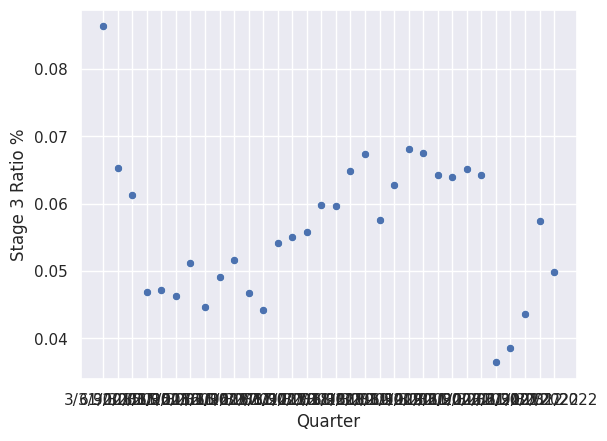

In [ ]:
sns.scatterplot(x='Quarter', y='Stage 3 Ratio %', data=df)

<Axes: xlabel='Unemployment rate'>

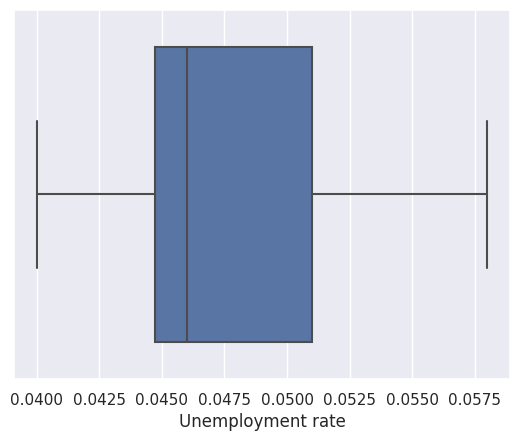

In [ ]:
sns.boxplot(x='Unemployment rate',data=df)

<Axes: xlabel='Overall Banking Sector NPA % Lag 2'>

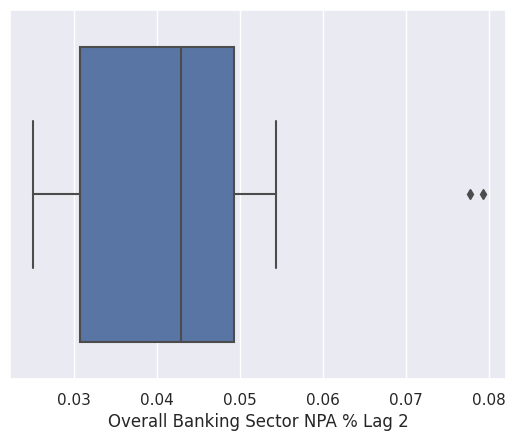

In [ ]:
sns.boxplot(x='Overall Banking Sector NPA % Lag 2',data=df)

<Axes: xlabel='LLR/TL Ratio %', ylabel='Density'>

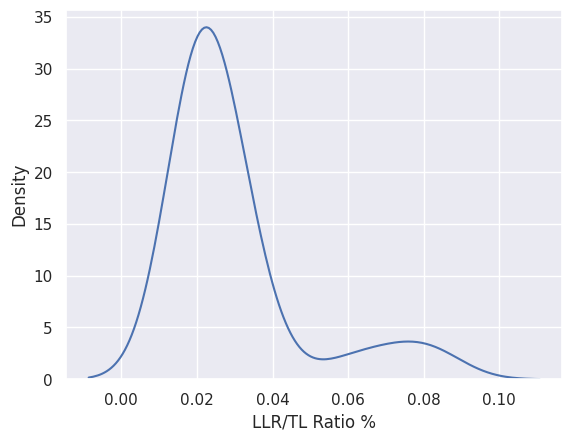

In [ ]:
sns.kdeplot(data=df,x='LLR/TL Ratio %')

<Axes: xlabel='ROA Ratio %', ylabel='Count'>

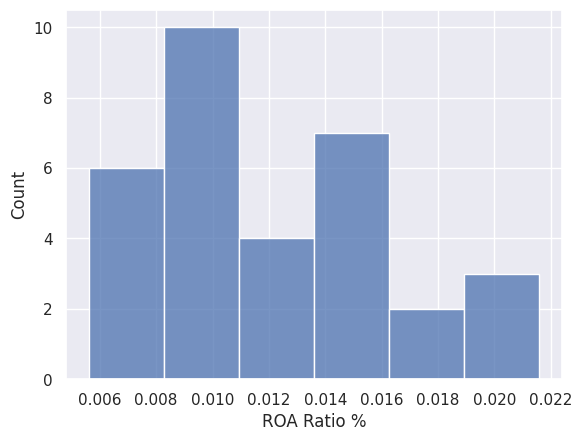

In [ ]:
sns.histplot(data=df,x='ROA Ratio %')

### Decriptive data analysis

In [ ]:
data.describe()

,Stage 3 Ratio %,Overall Banking Sector NPA % Lag 2,Average Weighted Prime Lending Rate - AWPR (percent p.a.),Average Weighted Deposit Rate (percent p.a.),Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.),GDP Growth Rate,DTI Ratio,Quarterly Average Exchange Rate USD/LKR,"Colombo Consumers' Price Index, Base 2013=100",Average of Inter Bank Call - Minimum Rate,...,Private Sector Credit Growth,Unemployment rate,LLR/TL Ratio %,ROA Ratio %,ROE Ratio %,SLAR for Domestic Bank units %,Debt/Equity times,Interest Margin %,CAR%,Cost-to-Income Ratio %
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.056128,0.042141,0.109719,0.076859,0.096144,0.010969,21.217188,185.342188,155.481250,0.078869,...,0.033312,0.047375,0.029491,0.012125,0.106300,0.244672,0.004206,0.042434,0.134300,0.497700
std,0.010570,0.013349,0.052633,0.020456,0.028218,0.061237,11.954067,60.632995,36.337455,0.027352,...,0.026604,0.004858,0.017690,0.004184,0.030365,0.030297,0.000753,0.005244,0.008043,0.084300
min,0.036400,0.025000,0.056700,0.047500,0.056400,-0.163000,9.330000,132.400000,116.500000,0.045200,...,-0.032900,0.040000,0.017900,0.005600,0.058300,0.206000,0.002900,0.036300,0.113300,0.279300
25%,0.047025,0.030725,0.074200,0.060150,0.072725,0.012500,12.020000,150.052500,126.525000,0.062875,...,0.023825,0.044750,0.019250,0.009225,0.084325,0.222100,0.003775,0.039950,0.130200,0.462900
50%,0.056600,0.042900,0.106350,0.080350,0.098600,0.027000,17.220000,175.915000,138.450000,0.079250,...,0.035150,0.046000,0.021500,0.010900,0.097700,0.231900,0.004200,0.041300,0.135400,0.525450
75%,0.064225,0.049225,0.117050,0.089250,0.111475,0.039250,26.977500,190.122500,181.625000,0.084275,...,0.048375,0.051000,0.030725,0.014825,0.127725,0.263675,0.004700,0.042700,0.138875,0.546375
max,0.086300,0.079300,0.281900,0.140600,0.184900,0.163000,45.790000,363.240000,244.700000,0.155000,...,0.091400,0.058000,0.084100,0.021600,0.156200,0.313100,0.005800,0.063300,0.148400,0.637300


In [ ]:
correlation = df['CAR%'].corr(df['Stage 3 Ratio %'])

In [ ]:
correlation

0.4507608930030312

In [ ]:
from scipy.stats import ttest_1samp
# Define the hypothesized population mean
hypothesized_mean = 0.07

# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(data['Stage 3 Ratio %'], hypothesized_mean)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -7.423981392433245
P-value: 2.3167478984248147e-08


sample mean is same as the hypothesized population mean

# Data Analysis - Regression

### Model 01: Linear Regression

In [ ]:
x_new_1.columns

Index(['Overall Banking Sector NPA % Lag 2',
       'Average Weighted Prime Lending Rate - AWPR (percent p.a.)',
       'Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.)',
       'GDP Growth Rate', 'DTI Ratio',
       'Quarterly Average Exchange Rate USD/LKR',
       'Colombo Consumers' Price Index, Base 2013=100',
       'Inter Bank Call - Weighted Average Rate',
       'Market Repo - Weighted Average Rate', 'Private Sector Credit Growth',
       'Unemployment rate', 'LLR/TL Ratio %', 'ROA Ratio %', 'ROE Ratio %',
       'SLAR for Domestic Bank units %', 'CAR%', 'Cost-to-Income Ratio %'],
      dtype='object')

In [ ]:
x_new_1.shape

(32, 17)

In [ ]:
from pyparsing import results
from math import *
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new_1,y_new_1, test_size = 0.2, random_state = 365)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25, 17)
(7, 17)
(25,)
(7,)


In [ ]:
x_test.columns

Index(['Overall Banking Sector NPA % Lag 2',
       'Average Weighted Prime Lending Rate - AWPR (percent p.a.)',
       'Average Weighted Fixed Deposit Rate - AWFDR (percent p.a.)',
       'GDP Growth Rate', 'DTI Ratio',
       'Quarterly Average Exchange Rate USD/LKR',
       'Colombo Consumers' Price Index, Base 2013=100',
       'Inter Bank Call - Weighted Average Rate',
       'Market Repo - Weighted Average Rate', 'Private Sector Credit Growth',
       'Unemployment rate', 'LLR/TL Ratio %', 'ROA Ratio %', 'ROE Ratio %',
       'SLAR for Domestic Bank units %', 'CAR%', 'Cost-to-Income Ratio %'],
      dtype='object')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
LR = LinearRegression()

LR.fit(x_train,y_train)

y_pred = LR.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 8.059492329328346e-05
Root Mean Squared Error (RMSE): 0.008977467532287904
Mean Absolute Error (MAE): 0.006305029026976059
R-squared: -0.6124644738034131


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.1 MB/s eta 0:00:00


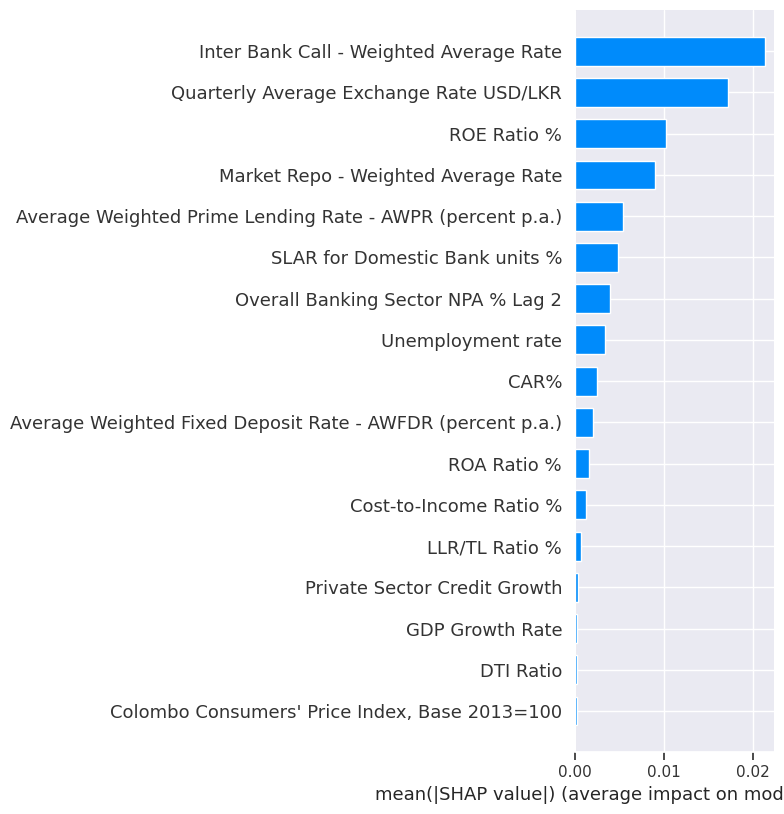

In [ ]:
import shap

#computing shap values
explainer = shap.LinearExplainer(LR,x_train)
shap_values1 = explainer.shap_values(x_test)

#generate summary plot
shap.summary_plot(shap_values1,x_test,plot_type='bar')